<a href="https://colab.research.google.com/github/aaditkamat/analytics-projects/blob/main/Undergraduate_Program_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
college_df = pd.read_csv('Universities.csv')
college_df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [10]:
college_df.rename(columns={
    '# appli. rec\'d': 'applications received',
    '# appl. accepted': 'applications accepted'
}, inplace=True)
college_df.columns

Index(['College Name', 'State', 'Public (1)/ Private (2)',
       'applications received', 'applications accepted',
       '# new stud. enrolled', '% new stud. from top 10%',
       '% new stud. from top 25%', '# FT undergrad', '# PT undergrad',
       'in-state tuition', 'out-of-state tuition', 'room', 'board',
       'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD',
       'stud./fac. ratio', 'Graduation rate'],
      dtype='object')

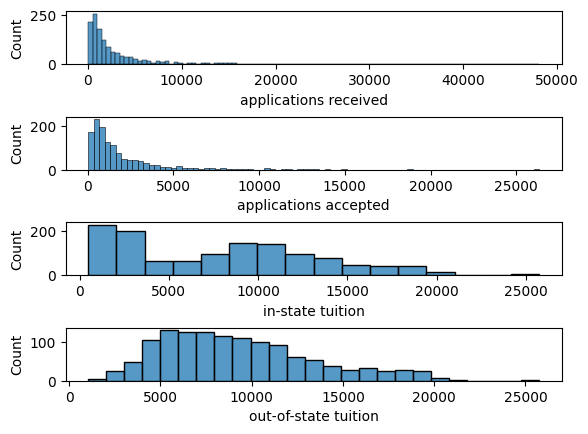

In [11]:
cols = ['applications received', 'applications accepted', 'in-state tuition', 'out-of-state tuition']
fig, ax = plt.subplots(nrows=len(cols), ncols=1)
for i, col in enumerate(cols):
  sns.histplot(college_df, x=col, ax=ax[i])
plt.subplots_adjust(hspace=1.0)
plt.show()

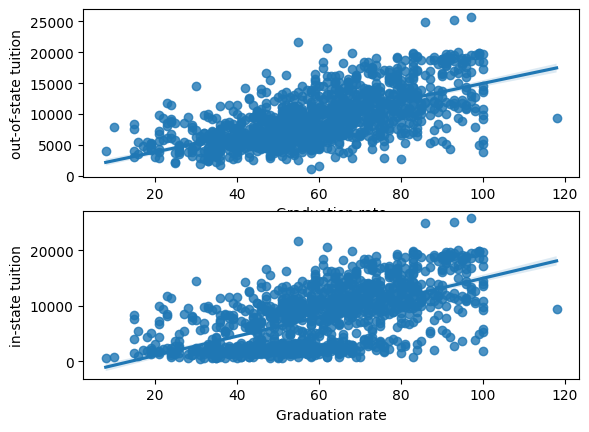

In [15]:
cols = ['out-of-state tuition', 'in-state tuition']
fig, ax = plt.subplots(nrows=len(cols), ncols=1)
for i, col in enumerate(cols):
  sns.regplot(college_df, x='Graduation rate', y=col, ax=ax[i])
plt.show()

In [20]:
numeric_df = college_df.iloc[:, 2:]
numeric_data = scale(numeric_df.dropna(axis=0))
# We normalize the data because the values for the different variables are measured in different units
# We also drop rows where there are null values because PCA cannot run on null values

pcs = PCA()
pcs.fit(numeric_data)
stats_data = pd.DataFrame({
    'Standard Deviation': np.sqrt(pcs.explained_variance_),
    'Explained Proportion of Variance': pcs.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)
}).transpose()
stats_data.rename(columns={i: f'PC{i + 1}' for i in range(len(stats_data.columns))}, inplace=True)
stats_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Standard Deviation,2.367306,2.190747,1.111340,1.033908,0.991885,0.874697,0.835595,0.773645,0.734651,0.663437,0.630523,0.585285,0.459037,0.438186,0.300828,0.189166,0.147323,0.119932
Explained Proportion of Variance,0.310680,0.266066,0.068470,0.059261,0.054542,0.042415,0.038708,0.033181,0.029920,0.024401,0.022040,0.018991,0.011682,0.010644,0.005017,0.001984,0.001203,0.000797
Cumulative Proportion,0.310680,0.576746,0.645215,0.704476,0.759018,0.801433,0.840140,0.873321,0.903242,0.927642,0.949682,0.968673,0.980354,0.990999,0.996016,0.997999,0.999203,1.000000


We need at least 12 Principal Components to account for 95% of variations in the dataset.

In [24]:
weights_df = pd.DataFrame(data=pcs.components_, columns=stats_data.columns, index=numeric_df.columns)
weights_df.loc[:, 'PC1'].idxmax(), weights_df.loc[:, 'PC1'].max()

('add. fees', 0.614319452204213)

Additional fees variable has the highest contribution to the first principal component. Since PC1 is the principal component that explains the most variance within the dataset, we can consider Additional fees as the most important numerical variable.

We have normalized the data since the different variables have values expressed in different units and we can only analyze them if they are converted to values that are spread out across common ranges.